# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [79]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress


In [80]:
# Import API key
from api_keys import weather_api_key

In [81]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [82]:
# Import simple Python library citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_df = "output_data/cities.csv"

In [83]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [88]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [103]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_keys}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -59.65,
        "lat": -29.15
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 71.53,
        "feels_like": 67.21,
        "temp_min": 71.53,
        "temp_max": 71.53,
        "pressure": 1007,
        "humidity": 60,
        "sea_level": 1007,
        "grnd_level": 1001
    },
    "visibility": 10000,
    "wind": {
        "speed": 11.52,
        "deg": 176
    },
    "clouds": {
        "all": 100
    },
    "dt": 1597095382,
    "sys": {
        "country": "AR",
        "sunrise": 1597055716,
        "sunset": 1597095158
    },
    "timezone": -10800,
    "id": 3429594,
    "name": "Reconquista",
    "cod": 200
}


In [105]:
print(requests.get(query_url + city))

<Response [200]>


In [106]:
#set up lists to hold response inf 
city_name = []
country = []
date = []
latitude = []
longitude = []
temperature_max = []
humidity = []
cloudiness = []
wind_speed = []

# Processing record counter starting as 1
processing_record = 1

# Print starting log statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#loop through the list of cities and perform a request for data on each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase processing record counter by 1 
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print ending log statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")
        

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Uberlândia
Processing Record 2 | Norman Wells
Processing Record 3 | Margate
Processing Record 4 | Rikitea
Processing Record 5 | Punta Arenas
Processing Record 6 | Yellowknife
Processing Record 7 | Shitanjing
Processing Record 8 | Shingū
Processing Record 9 | Hilo
Processing Record 10 | Khovd
Processing Record 11 | New Norfolk
Processing Record 12 | Streator
Processing Record 13 | Nikolskoye
Processing Record 14 | Ushuaia
Processing Record 15 | Linguère
Processing Record 16 | Buxtehude
Processing Record 17 | Kirakira
City not found. Skipping...
Processing Record 18 | Mataura
Processing Record 19 | Saint Anthony
Processing Record 20 | Upernavik
Processing Record 21 | Walvis Bay
Processing Record 22 | Bintulu
City not found. Skipping...
Processing Record 23 | Carnarvon
City not found. Skipping...
Processing Record 24 | Nanortalik
Processing Record 25 | Richards Bay
Processing Record 26 | Cayenne
Processing Reco

Processing Record 231 | Half Moon Bay
City not found. Skipping...
Processing Record 232 | Alice Springs
Processing Record 233 | Vangaindrano
Processing Record 234 | Amahai
Processing Record 235 | Saldanha
Processing Record 236 | Thompson
Processing Record 237 | Tromsø
Processing Record 238 | Sinnamary
Processing Record 239 | Pacifica
Processing Record 240 | Huejuquilla el Alto
Processing Record 241 | Tsumeb
Processing Record 242 | Maryville
Processing Record 243 | Labuhan
Processing Record 244 | Nahrin
City not found. Skipping...
Processing Record 245 | Beringovskiy
Processing Record 246 | Bengkulu
Processing Record 247 | Newport
Processing Record 248 | Northam
Processing Record 249 | Nemuro
City not found. Skipping...
Processing Record 250 | Ambilobe
Processing Record 251 | Kiryat Gat
Processing Record 252 | Touros
Processing Record 253 | Kunshan
Processing Record 254 | Fortuna
City not found. Skipping...
Processing Record 255 | Tshane
Processing Record 256 | Cururupu
Processing Recor

Processing Record 466 | Kot Kapūra
Processing Record 467 | Khani
Processing Record 468 | Mt. Pleasant
Processing Record 469 | Dukhovnitskoye
Processing Record 470 | Paso de Carrasco
Processing Record 471 | Hvide Sande
Processing Record 472 | Polunochnoye
Processing Record 473 | Beira
Processing Record 474 | Sonqor
Processing Record 475 | Manono
Processing Record 476 | Punta de Bombón
Processing Record 477 | Āstāneh-ye Ashrafīyeh
Processing Record 478 | Australind
Processing Record 479 | Dunda
Processing Record 480 | Luleå
Processing Record 481 | Faya
Processing Record 482 | Aksarka
Processing Record 483 | Sechura
Processing Record 484 | Vitim
Processing Record 485 | Heilbron
City not found. Skipping...
Processing Record 486 | Lakatoro
Processing Record 487 | Beloha
Processing Record 488 | Santiago del Estero
Processing Record 489 | Pitimbu
Processing Record 490 | Niamey
Processing Record 491 | Batemans Bay
Processing Record 492 | Sterling
Processing Record 493 | Karasjok
City not found

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [119]:
# Create a DataFrame from cities, latitude, longitude, temperature, humidity, cloudiness & wind speed
weather_cities_df = {
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": temperature_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_cities_df)
weather_data.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [120]:
weather_data = pd.DataFrame(weather_cities_df)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Uberlândia,-18.92,-48.28,71.60,40,12,4.70,BR,1597097375
1,Norman Wells,65.28,-126.83,75.20,47,40,11.41,CA,1597097375
2,Margate,51.38,1.39,71.01,83,55,4.38,GB,1597097375
3,Rikitea,-23.12,-134.97,69.93,72,62,24.94,PF,1597097375
4,Punta Arenas,-53.15,-70.92,32.00,88,75,17.22,CL,1597097105


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [153]:
weather_data_count = pd.DataFrame(weather_cities_df)
weather_data.count()

weather_data_mean = pd.DataFrame(weather_cities_df)
weather_data_mean.mean()

weather_data_std = pd.DataFrame(weather_cities_df)
weather_data_std.std()

weather_data_min = pd.DataFrame(weather_cities_df)
weather_data_min.min()

weather_data_max = pd.DataFrame(weather_cities_df)
weather_data_max.max()

#weather_type = weather_cities_df.set_index(["stats])["lat"]
#weather_type
#summary statistics table of mean, standard deviation, min and max for each city.
summary_stats_table = pd.DataFrame({"count": weather_data_count,
                                    "mean": weather_data_mean, 
                                    "std": weather_data_std, 
                                    "min": weather_data_min, 
                                    "max": weather_data_max})
summary_stats_table

ValueError: If using all scalar values, you must pass an index

In [ ]:
#summary statistics table of mean, standard deviation, min and max for each city.
summary_stats_table = pd.DataFrame({"count": weather_data_count,
                                    "mean": weather_data_mean, 
                                    "std": weather_data_std, 
                                    "min": weather_data_min, 
                                    "max": weather_data_max}, index=[0])
summary_stats_table

In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

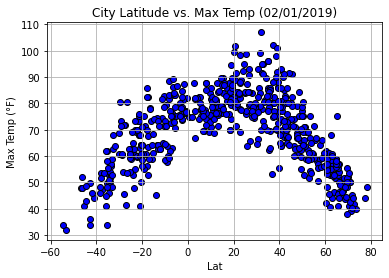

In [158]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temp (02/01/2019)")
plt.ylabel("Max Temp (°F)")
plt.xlabel("Lat")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

## Latitude vs. Humidity Plot

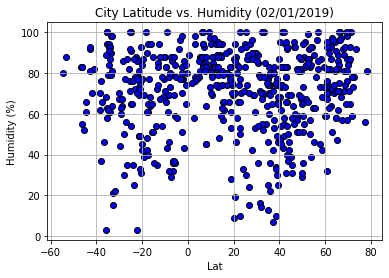

In [160]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolors="blue", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Lat")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

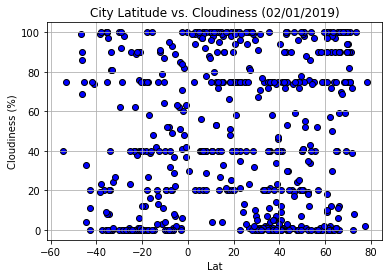

In [161]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lat")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

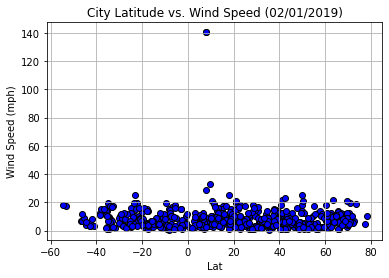

In [162]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Lat")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [166]:
# Create Northern and Southern Hemisphere DataFrames
nothern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


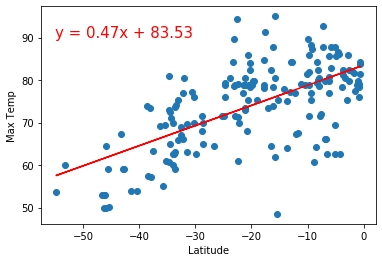

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


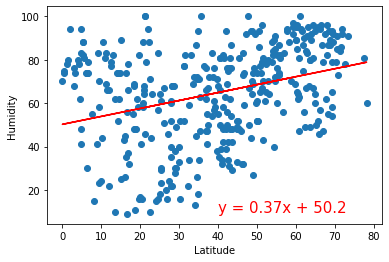

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


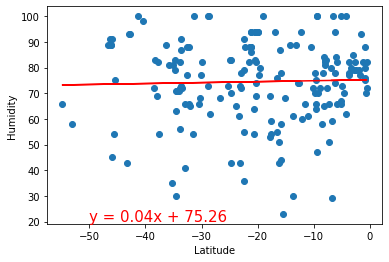

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


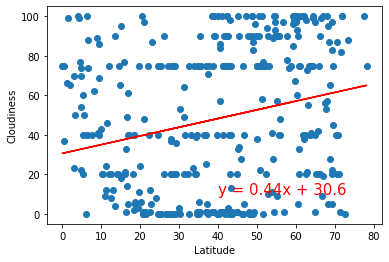

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


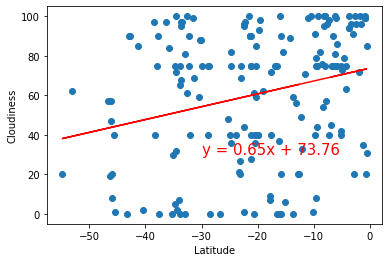

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


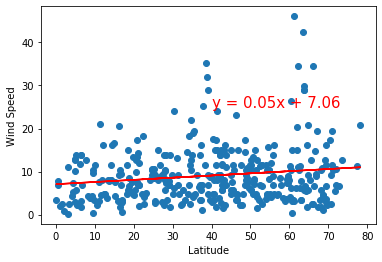

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


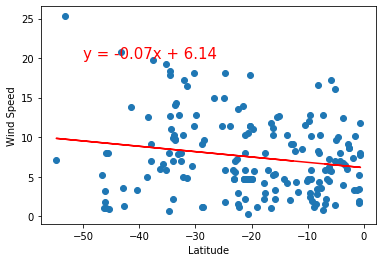